### Урок 3. Классификация. Логистическая регрессия

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [35]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [36]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [37]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [38]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [39]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [40]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [41]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [42]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [43]:
z = np.linspace(-10, 10, 101)

In [44]:
probabilities = sigmoid(z)

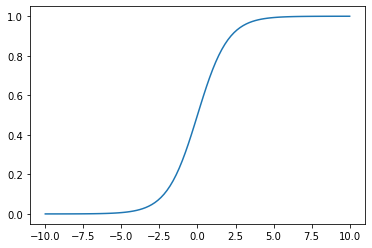

In [45]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [46]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [47]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.765117774502237
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442177
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515639
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.553273778823678


## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

### Задача 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log

In [48]:
def calc_logloss_2(y, y_pred):
    err = - np.mean(y * np.log(y_pred, where=(y_pred!=0)) + (1.0 - y) * np.log(1.0 - y_pred, where=(1-y_pred!=0))) # добавлен оператор where
    err = np.sum(err)
    return err

### Задача 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным

Подставим в функцию логистической регрессии нашу модифицированную функцию log_loss, далее как и с задачей линейной регрессии добавим критерий останова по функции ошибки и отслеживание колличества итераций для выявления оптимального колличества

In [58]:
def eval_model(X, y, verbose=False, alpha=1e-4, tol=0.00001): 
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True
    while stop_chek:
        errors = []
        n_iter += 1
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_2(y, y_pred) # заменим на модифицированную нами функцию
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, logloss: {min_err}')
            stop_chek = False
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    return W, min_err, n_iter
    
    

In [59]:
W = eval_model(X_st, y, alpha=0.6, tol=0.00001, verbose=True)

Stop descent! iteration: 5449, weights: [-19.88389849  -2.17629563  -5.13166996  16.53977688], logloss: 0.16583588446774883


Найдем лучший параметр скорости обучения

In [60]:
def get_best_params(X,y,args):
    best_params=[]
    for arg in args:
        W,err,n_iter = eval_model(X, y, alpha=arg)
        best_params.append((arg,err,n_iter))
    best_params.sort(key=lambda x:x[1])
    print(f'best - alpha: {best_params[0][0]},\nresults:\nerr: {best_params[0][1]},\nn_iter: {best_params[0][2]}')
    return best_params[0]

In [61]:
alphas=[1, 0.5,0.1,0.05, 0.01, 0.005, 0.001]
bp=get_best_params(X_st,y,alphas)
bp

Stop descent! iteration: 2, weights: [ 0.11732727 -1.58914029  0.62030812  0.95688359], logloss: 1.1785958344356262
Stop descent! iteration: 5588, weights: [-18.35029116  -2.03943006  -4.68623881  15.29282887], logloss: 0.1745142996409633
Stop descent! iteration: 5507, weights: [-7.85409116 -1.16596006 -1.51053115  6.85817166], logloss: 0.2644646885841899
Stop descent! iteration: 6217, weights: [-5.68112112 -1.03751043 -0.78050594  5.23775616], logloss: 0.29772674984784453
Stop descent! iteration: 5665, weights: [-1.51077461 -0.92062082  0.7677089   2.49733437], logloss: 0.4113212951463094
Stop descent! iteration: 2705, weights: [-0.28749979 -0.77956547  0.97673079  1.56687312], logloss: 0.4689040687626485
Stop descent! iteration: 1674, weights: [ 0.24314054 -0.71650811  0.70726759  1.27956464], logloss: 0.5115007726748093
best - alpha: 0.5,
results:
err: 0.1745142996409633,
n_iter: 5588


(0.5, 0.1745142996409633, 5588)

In [63]:
alphas=np.arange(1,10)/10
alphas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [64]:
bp=get_best_params(X_st,y,alphas)
bp

Stop descent! iteration: 5507, weights: [-7.85409116 -1.16596006 -1.51053115  6.85817166], logloss: 0.2644646885841899
Stop descent! iteration: 5473, weights: [-11.26122492  -1.42607616  -2.57916356   9.54824479], logloss: 0.227225466097774
Stop descent! iteration: 5668, weights: [-14.17179784  -1.67221877  -3.45623879  11.89872411], logloss: 0.20266966814928572
Stop descent! iteration: 5684, weights: [-16.49351659  -1.87498924  -4.14297044  13.78351526], logloss: 0.18614618122887366
Stop descent! iteration: 5588, weights: [-18.35029116  -2.03943006  -4.68623881  15.29282887], logloss: 0.1745142996409633
Stop descent! iteration: 5449, weights: [-19.88389849  -2.17629563  -5.13166996  16.53977688], logloss: 0.16583588446774883
Stop descent! iteration: 4, weights: [ 0.20089413 -0.9754314   0.73619273  1.29296406], logloss: 0.5606348884004944
Stop descent! iteration: 4, weights: [ 0.16967474 -1.19422836  0.72412524  1.26942358], logloss: 0.6239910394972162
Stop descent! iteration: 4, weig

(0.6, 0.16583588446774883, 5449)

Лучшее параметры для модели это 5449 итераций и alpha равная 0,6

### Задача 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba

In [65]:
def calc_pred_proba(w, x): 
    pred_proba = sigmoid(np.dot(w, x))
    return pred_proba

In [66]:
W,_err,_it = eval_model(X_st, y, alpha=0.6, verbose=True)

Stop descent! iteration: 5449, weights: [-19.88389849  -2.17629563  -5.13166996  16.53977688], logloss: 0.16583588446774883


In [67]:
y_pred_prob = calc_pred_proba(W, X_st)
y_pred_prob

array([3.79075791e-01, 6.84786993e-02, 9.99986668e-01, 3.50840343e-05,
       8.37531436e-01, 1.83584725e-01, 9.99998324e-01, 5.33913207e-02,
       5.08932298e-01, 9.99812077e-01])

### Задача 4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred

In [68]:
def calc_pred(w,x, prob_lim=0.5):    # установим порог вероятности, при превышении которого, объект будет относиться к классу 1
    pred_proba = sigmoid(np.dot(w, x))
    pred=np.zeros_like(pred_proba)
    for idx, prob in enumerate(pred_proba):
        if prob>prob_lim:
            pred[idx]=1
    return pred

In [69]:
y_pred=calc_pred(W, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

### Задача 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

Accuracy

In [71]:
def my_accuracy(real, pred):
    all_res=len(real)
    trues=0
    for i in range(all_res):
        trues+=int(real[i]==pred[i])
    return trues/all_res

In [72]:
my_accuracy(y,y_pred)

1.0

In [73]:
accuracy_score(y,y_pred)

1.0

Матрица ошибок

In [74]:
def my_confusion_matrix(real, pred):
    n_classes=len(np.unique(real))
    all_res=len(real)
    conf_matr=np.zeros((n_classes,n_classes), dtype='int')
    for i in range(all_res):
        conf_matr[int(real[i])][int(pred[i])] += 1
    return conf_matr  

In [75]:
my_confusion_matrix(y,y_pred)

array([[5, 0],
       [0, 5]])

In [76]:
confusion_matrix(y,y_pred)

array([[5, 0],
       [0, 5]], dtype=int64)

Точность

In [78]:
def my_precision(real, pred):
    tn, fp, fn, tp = my_confusion_matrix(real, pred).ravel()
    return tp/(tp+fp)

In [79]:
my_precision(y,y_pred)

1.0

In [80]:
precision_score(y,y_pred)

1.0

Полнота

In [81]:
def my_recall(real, pred):
    tn, fp, fn, tp = my_confusion_matrix(real, pred).ravel()
    return tp/(tp+fn)

In [82]:
my_recall(y,y_pred)

1.0

In [83]:
recall_score(y,y_pred)

1.0

F1 score

In [84]:
def my_f1(real, pred, beta=1):
    return (1+beta**2)*my_precision(real, pred)*my_recall(y,y_pred)/(beta**2*my_precision(real, pred)+my_recall(y,y_pred))

In [85]:
my_f1(y,y_pred)

1.0

In [86]:
f1_score(y,y_pred)

1.0

### Задача 6. Могла ли модель переобучиться? Почему?

Могла, так как мы не использовали инструменты предотвращающие переобучение, например регулиризацию.